In [15]:
import sys

sys.path.append("../")

import tensortree
from io import StringIO
import numpy as np

tensortree.set_backend("tensorflow")

# parse a tree 
handle = StringIO("(A:0.1,B:0.2,(C:0.3,D:0.4)E:0.5)F;")
tree = tensortree.TreeHandler.read(handle)

# leaves with final shape (n, 1, L, d)
leaves = np.array([[0,2,3], 
                   [1,1,0], 
                   [2,1,0], 
                   [3,1,2]])
leaves = np.eye(4)[leaves]
leaves = leaves[:,np.newaxis] # model dimension, here we'll use a single model

leaf_names = ['A', 'B', 'C', 'D'] 

# use a rate matrix, here Jukes-Cantor, shape (1, d, d)
rate_matrix = np.array([[[-1, 1./3, 1./3, 1./3], 
                         [1./3, -1, 1./3, 1./3], 
                         [1./3, 1./3, -1, 1./3], 
                         [1./3, 1./3, 1./3, -1]]])

leaves = leaves.astype(tensortree.util.default_dtype)
rate_matrix = rate_matrix.astype(tensortree.util.default_dtype)

# compute the loglikelihood log P(leaves | tree)
L = tensortree.model.loglik(leaves, 
                            tree, 
                            rate_matrix, 
                            tree.branch_lengths,
                            equilibrium_logits=np.log([[1./4, 1./4, 1./4, 1./4]]),
                            leaf_names=leaf_names,
                            leaves_are_probabilities=True)

print("Loglikelihood: ", L)

Loglikelihood:  tf.Tensor([[-7.605143  -5.7625747 -7.249683 ]], shape=(1, 3), dtype=float32)


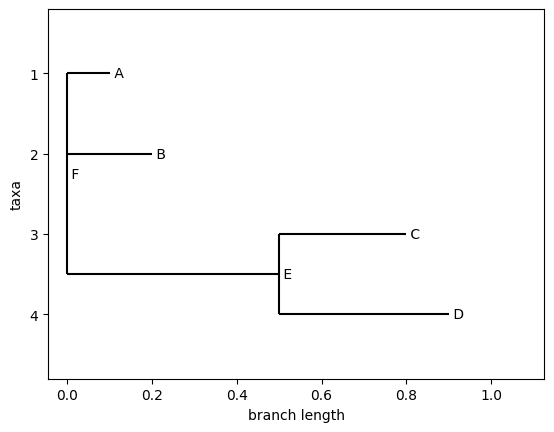

In [ ]:
# a simple plot of the tree can be generated like this
tree.draw()

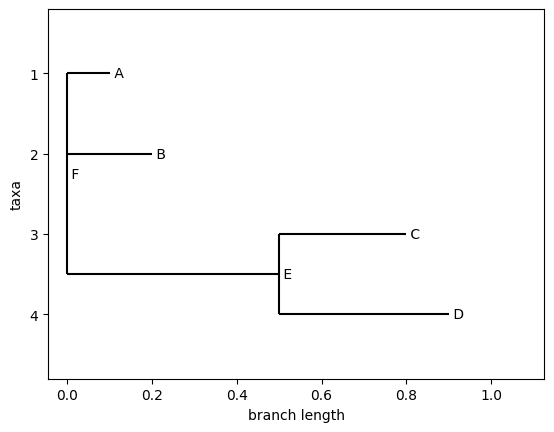

In [28]:
# draw and save as png
import matplotlib.pyplot as plt

figure, ax = plt.subplots()
tree.draw(axes=ax)
figure.savefig("example.png")

In [29]:
# compute marginal distributions at all ancestral nodes, i.e. P(ancestral_node | leaves, tree) 
M = tensortree.model.compute_ancestral_marginals(leaves, 
                                                tree, 
                                                rate_matrix, 
                                                tree.branch_lengths,
                                                equilibrium_logits=np.log([[1./4, 1./4, 1./4, 1./4]]),
                                                leaf_names=leaf_names,
                                                leaves_are_probabilities=True,
                                                return_probabilities=True)

ancestral_names = ["E", "F"]
for i in range(len(ancestral_names)):
    print("Marginal distributions of node", ancestral_names[i], ":\n", M[i].numpy())

Marginal distributions of node E :
 [[[0.15933783 0.09937008 0.42822528 0.31306723]
  [0.0074275  0.9599043  0.02524071 0.0074275 ]
  [0.63605314 0.03286138 0.21941343 0.11167206]]]
Marginal distributions of node F :
 [[[0.60789233 0.29487458 0.05354059 0.04369259]
  [0.01026389 0.68136317 0.2981091  0.01026389]
  [0.52866733 0.01466862 0.03062199 0.42604187]]]
